In [95]:
from sklearn.datasets import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors, model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import cv2


# Exploration des données

In [96]:
digit = load_digits()
digit.data.shape

(1797, 64)

In [97]:
digit.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [98]:
dig = pd.DataFrame(digit['data'][0:1700])
dig.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [99]:
# Utiliser isnull() pour détecter les valeurs manquantes
missing_values = dig.isnull().sum()

# Afficher les valeurs manquantes
print("Nombre de valeurs manquantes par colonne :")
print(missing_values)

Nombre de valeurs manquantes par colonne :
0     0
1     0
2     0
3     0
4     0
     ..
59    0
60    0
61    0
62    0
63    0
Length: 64, dtype: int64


In [100]:
#Fonction pour afficher ième image
def displayImage(i):
    plt.imshow(digit['images'][i], cmap='Greys_r')
    plt.show()

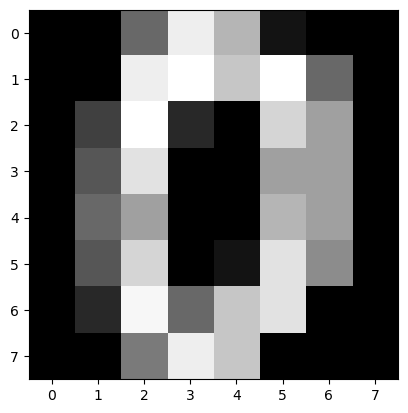

In [101]:
#Affichage du premier élément du jeu de données 
displayImage(0) 

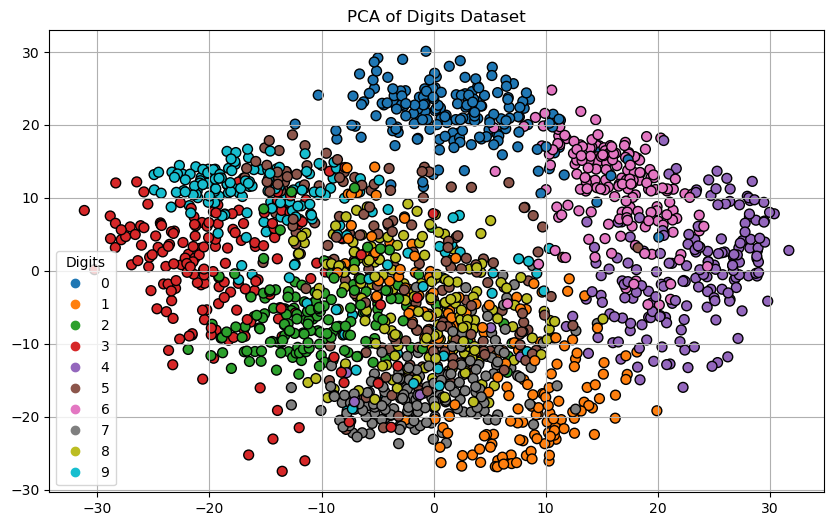

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_pca = pca.fit_transform(X)

# Plot PCA-reduced data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='tab10', edgecolor='k', s=50)
plt.title('PCA of Digits Dataset')
plt.legend(*scatter.legend_elements(), title='Digits')
plt.grid(True)
plt.show()


 Un histogramme présentant le nombre d'occurrences de chaque chiffre de 0 à 9 dans votre jeu de données.

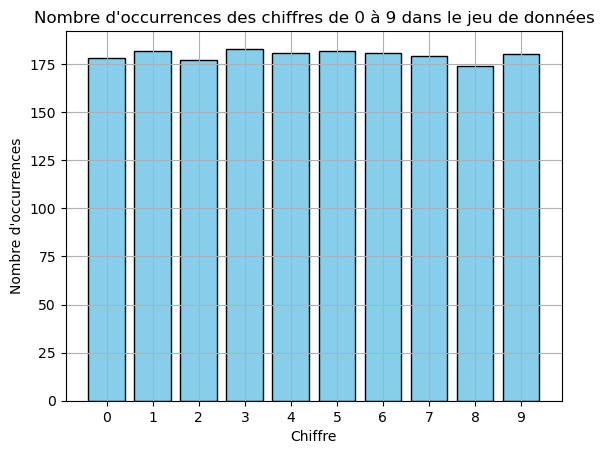

In [103]:
#Un histogramme présentant le nombre d'occurrences de chaque chiffre de 0 à 9 dans votre jeu de données.

# Initialiser le compteur d'occurrences pour chaque chiffre
occurrences = [0] * 10

# Compter le nombre d'occurrences de chaque chiffre dans le jeu de données
for label in digit['target']:
    occurrences[label] += 1

# Créer le graphique
plt.bar(range(10), occurrences, color='skyblue', edgecolor='black')
plt.xlabel('Chiffre')
plt.ylabel('Nombre d\'occurrences')
plt.title('Nombre d\'occurrences des chiffres de 0 à 9 dans le jeu de données')
plt.xticks(range(10))  
plt.grid(True)

# Afficher le graphique
plt.show()


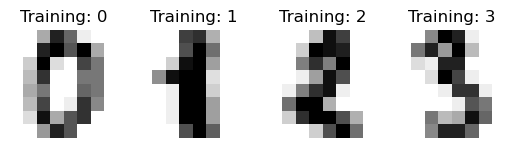

In [104]:
#Représentation visuelle des données
_ , axes = plt.subplots(nrows = 1, ncols = 4)
for ax, image, label in zip(axes, digit.images, digit.target):
    ax.set_axis_off()
    ax.imshow(image, cmap = plt.cm.gray_r)
    ax.set_title("Training: %i" % label)

# Modèles de classification avec les pixels de l'image

In [105]:
def plot_images_with_predictions(X_test, predicted, nrows=1, ncols=4):
    """
    Affiche une série d'images de test avec leurs prédictions associées.

    Args:
        X_test (array_like): Liste d'images de test.
        predicted (array_like): Prédictions associées à chaque image.
        nrows (int, optional): Nombre de lignes pour la disposition des sous-graphiques. Par défaut, 1.
        ncols (int, optional): Nombre de colonnes pour la disposition des sous-graphiques. Par défaut, 4.
    """
    _, axes = plt.subplots(nrows=nrows, ncols=ncols)
    for ax, image, prediction in zip(axes, X_test, predicted):
        ax.set_axis_off()
        image = image.reshape(8, 8)
        ax.imshow(image, cmap=plt.cm.gray_r)
        ax.set_title(f"Prediction: {prediction}")


In [106]:
def plot_misclassified_image(X_test, y_test, predicted):
    """
    Affiche une image mal prédite avec sa prédiction incorrecte et son étiquette réelle.

    Args:
        X_test (array_like): Liste d'images de test.
        y_test (array_like): Liste des étiquettes réelles correspondant aux images de test.
        predicted (array_like): Prédictions faites par le modèle pour les images de test.
    """
    incorrect_indices = [i for i in range(len(y_test)) if y_test[i] != predicted[i]]
    index = incorrect_indices[0]  # Prendre le premier index d'une prédiction incorrecte
    image = X_test[index].reshape(8, 8)
    prediction = predicted[index]

    plt.imshow(image, cmap=plt.cm.gray_r)
    plt.title(f"Prediction incorrecte: {prediction}, Étiquette réelle: {y_test[index]}")
    plt.axis('off')
    plt.show()

In [107]:
def guess_digit(image_path, model):
    # Charger et prétraiter l'image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    resized_image = cv2.resize(image, (8, 8))
    inverted_image = cv2.bitwise_not(resized_image)
    
    # Aplatir l'image
    flat_image = inverted_image.reshape(1, -1)
    
    # Faire une prédiction
    prediction = model.predict(flat_image)
    
    return prediction[0]

## K-NN
Au début, nous avons pris n_neighbors = 2 -> précision = 0.9777
Après l'optimisation du modèle, nous avons pris le n_neighbors le plus performant = 3 -> 0.988

In [108]:
train_x = digit.data
train_y = digit.target 

#découpage du jeu de données : 25% de Testing Set, nous continuerons à utiliser le même ensemble de données pour le reste du projet.
X_train, X_test, y_train, y_test = train_test_split(train_x,train_y, test_size = 0.25) 


In [109]:
#Sélectionner un estimateur et préciser son hyperparamètre
KNN = KNeighborsClassifier(3) #on veut entrainer un 3-NN Classifier (on utilise 7 voisins)

#Entrainer le modèle sur les données X, y (divisées en 2 tableaux Numpy)
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [110]:
#Évaluer le modèle
print("\033[91mPrécision du classificateur KNN-2 : \033[0m", KNN.score(X_test, y_test)) 

Précision du classificateur KNN-2 :  0.9866666666666667


In [111]:
#Utiliser le modèle
predicted1 = KNN.predict(X_test)

une série d'images de test avec leurs prédictions associées pour KNN-3

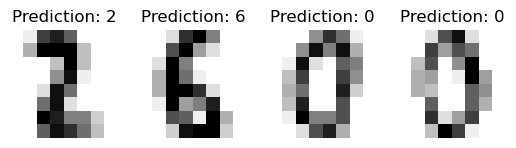

In [112]:

plot_images_with_predictions(X_test, predicted1)

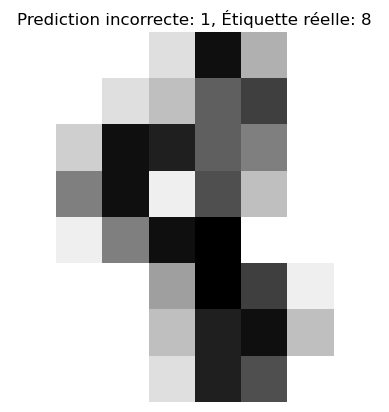

In [113]:
#Affiche une image mal prédite avec sa prédiction incorrecte et son étiquette réelle
plot_misclassified_image(X_test, y_test, predicted1)

In [114]:
# Utilisation de la fonction pour deviner le chiffre dans une nouvelle image
image_path = "image.webp"  # Remplacez "image.webp" par le chemin de votre image
prediction = guess_digit(image_path, KNN)
print("Prediction:", prediction)

#Miscalification

Prediction: 1


## SVM (Support Vector Machines)

### SVC
Au début, nous avons pris gamma = 0.1 -> précision = 0.85
Après l'optimisation du modèle, nous avons pris le n_neighbors le plus performant = 0.001 -> 0.99111

In [115]:
n_samples = len(digit.images)
data = digit.images.reshape((n_samples, -1))

In [116]:
#Sélectionner un estimateur et préciser son hyperparamètres
sv = SVC(gamma = 0.001)

In [117]:
#Entrainer le modèle 
sv.fit(X_train, y_train)

SVC(gamma=0.001)

In [118]:
#Utiliser le modèle
predicted2 = sv.predict(X_test)

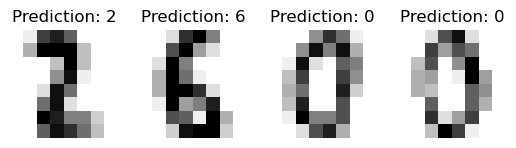

In [119]:
#une série d'images de test avec leurs prédictions associées pour SVM
plot_images_with_predictions(X_test, predicted2)

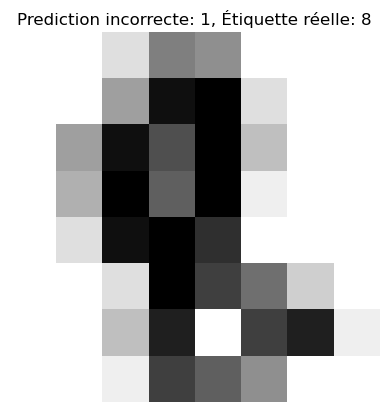

In [120]:
#Affiche une image mal prédite avec sa prédiction incorrecte et son étiquette réelle
plot_misclassified_image(X_test, y_test, predicted2)

In [121]:
#Évaluer le modèle
print("\033[91mPrécision du classificateur SVM : \033[0m", sv.score(X_test, y_test))

Précision du classificateur SVM :  0.9933333333333333


In [122]:
print(
    f"Classification report for classifier {sv}:\n"
    f"{metrics.classification_report(y_test, predicted2)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.96      1.00      0.98        47
           2       1.00      1.00      1.00        35
           3       1.00      1.00      1.00        44
           4       1.00      1.00      1.00        47
           5       1.00      0.97      0.99        37
           6       1.00      1.00      1.00        45
           7       1.00      1.00      1.00        42
           8       1.00      0.96      0.98        47
           9       0.98      1.00      0.99        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450




Confusion matrix:
[[59  0  0  0  0  0  0  0  0  0]
 [ 0 47  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  0  0]
 [ 0  0  0  0 47  0  0  0  0  0]
 [ 0  0  0  0  0 36  0  0  0  1]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 42  0  0]
 [ 0  2  0  0  0  0  0  0 45  0]
 [ 0  0  0  0  0  0  0  0  0 47]]


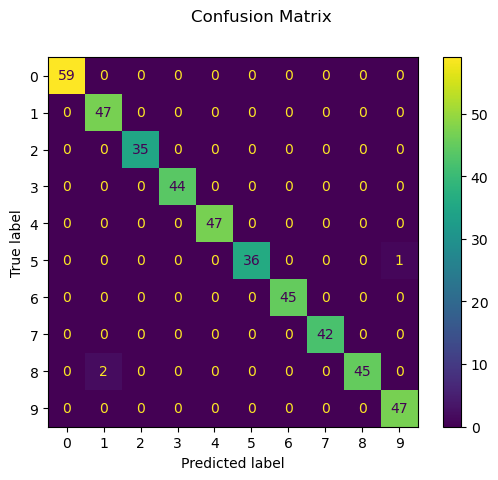

In [123]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted2)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

 Nous avons essayer d'autres modèles comme : RandomForestClassifier & Naive Bayes

## RandomForestClassifier

In [124]:
#Sélectionner un estimateur et préciser son hyperparamètres
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [125]:
#Entrainer le modèle sur les données X, y (divisées en 2 tableaux Numpy)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [126]:
#Évaluer le modèle
print("\033[91mPrécision du classificateur RandomForestClassifier : \033[0m", rf_classifier.score(X_test, y_test))

Précision du classificateur RandomForestClassifier :  0.9555555555555556


In [127]:
#Utiliser le modèle 
y_pred = rf_classifier.predict(X_test)

Une série d'images de test avec leurs prédictions associées pour RandomForestClassifier

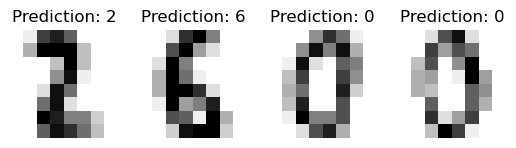

In [128]:

plot_images_with_predictions(X_test, y_pred)

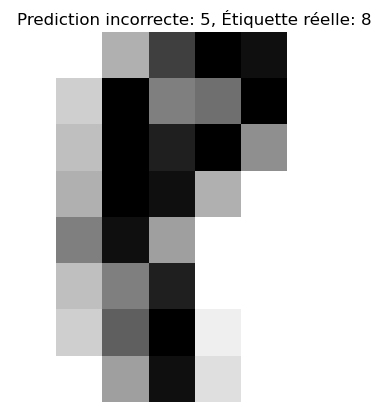

In [129]:
#Affiche une image mal prédite avec sa prédiction incorrecte et son étiquette réelle
plot_misclassified_image(X_test, y_test, y_pred)

In [130]:
print(
    f"Classification report for classifier {rf_classifier}:\n"
    f"{metrics.classification_report(y_test, y_pred)}\n"
)

Classification report for classifier RandomForestClassifier(random_state=42):
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        59
           1       0.94      1.00      0.97        47
           2       0.97      0.97      0.97        35
           3       0.96      1.00      0.98        44
           4       0.94      1.00      0.97        47
           5       0.94      0.92      0.93        37
           6       1.00      0.98      0.99        45
           7       0.89      1.00      0.94        42
           8       0.97      0.81      0.88        47
           9       0.96      0.91      0.93        47

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.95       450
weighted avg       0.96      0.96      0.95       450




Confusion matrix:
[[57  0  0  0  2  0  0  0  0  0]
 [ 0 47  0  0  0  0  0  0  0  0]
 [ 0  1 34  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  0  0]
 [ 0  0  0  0 47  0  0  0  0  0]
 [ 0  0  0  0  1 34  0  0  0  2]
 [ 1  0  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 42  0  0]
 [ 0  2  1  2  0  2  0  2 38  0]
 [ 0  0  0  0  0  0  0  3  1 43]]


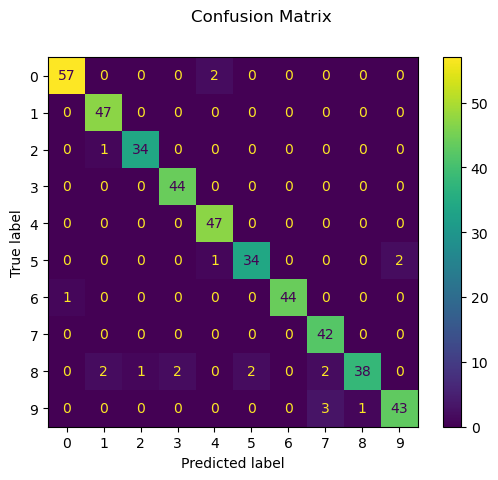

In [131]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [132]:
# Utilisation de la fonction pour deviner le chiffre dans une nouvelle image
image_path = "image.webp"  # Remplacez "image.webp" par le chemin de votre image
prediction = guess_digit(image_path, rf_classifier)
print("Prediction:", prediction)

#Miscalification

Prediction: 1


## Naive Bayes

In [133]:
#Sélectionner un estimateur et préciser son hyperparamètres
gaussian = GaussianNB()

In [134]:
# Entraînement du modèle
gaussian.fit(X_train, y_train)

GaussianNB()

In [135]:
#Évaluer le modèle
print("\033[91mPrécision du classificateur Naive Bayes : \033[0m", gaussian.score(X_test, y_test))

Précision du classificateur Naive Bayes :  0.8177777777777778


In [136]:
# Prédictions sur l'ensemble de test
p = gaussian.predict(X_test)

une série d'images de test avec leurs prédictions associées pour Naive Bayes

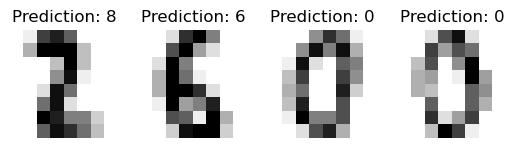

In [137]:

plot_images_with_predictions(X_test, p)

Affiche une image mal prédite avec sa prédiction incorrecte et son étiquette réelle

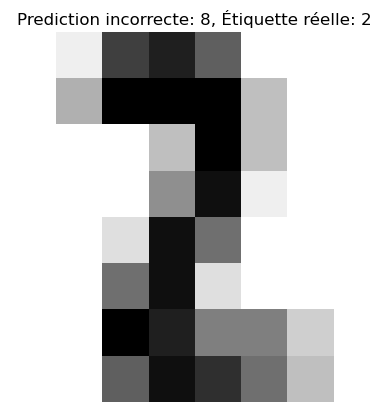

In [138]:
plot_misclassified_image(X_test, y_test, p)

Confusion matrix:
[[58  0  0  0  1  0  0  0  0  0]
 [ 0 41  0  0  0  0  0  1  5  0]
 [ 0  6 14  1  0  0  0  0 14  0]
 [ 0  1  1 35  0  0  0  2  4  1]
 [ 0  1  0  0 41  0  0  4  1  0]
 [ 0  1  0  2  0 30  0  3  1  0]
 [ 0  0  0  0  1  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 42  0  0]
 [ 0  6  0  0  0  1  0  1 39  0]
 [ 0  9  0  1  2  0  0  6  5 24]]


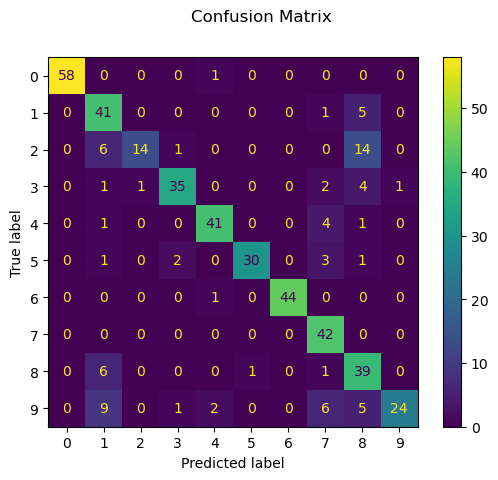

In [139]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, p)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# PCA - Création de nouveaux descripteurs avec PCA

In [140]:
pca = PCA(n_components = 0.94)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

## KNN_PCA

In [141]:
# Modèle de classification avec les composantes principales
KNN_pca =  KNeighborsClassifier(3)
KNN_pca.fit(X_train_pca, y_train)
y_pred_pca = KNN_pca.predict(X_test_pca)

In [142]:
print("Classification report with PCA features:")
print(classification_report(y_test, y_pred_pca))

Classification report with PCA features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.98      1.00      0.99        47
           2       1.00      1.00      1.00        35
           3       0.94      1.00      0.97        44
           4       1.00      1.00      1.00        47
           5       1.00      0.97      0.99        37
           6       1.00      1.00      1.00        45
           7       0.98      1.00      0.99        42
           8       0.98      0.89      0.93        47
           9       0.96      0.96      0.96        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [143]:
#Évaluer le modèle
print("\033[91mPrécision du classificateur KNN-3_PCA : \033[0m", KNN_pca.score(X_test_pca, y_test)) 

Précision du classificateur KNN-3_PCA :  0.9822222222222222


Confusion matrix:
[[59  0  0  0  0  0  0  0  0  0]
 [ 0 47  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  0  0]
 [ 0  0  0  0 47  0  0  0  0  0]
 [ 0  0  0  0  0 36  0  0  0  1]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 42  0  0]
 [ 0  1  0  2  0  0  0  1 42  1]
 [ 0  0  0  1  0  0  0  0  1 45]]


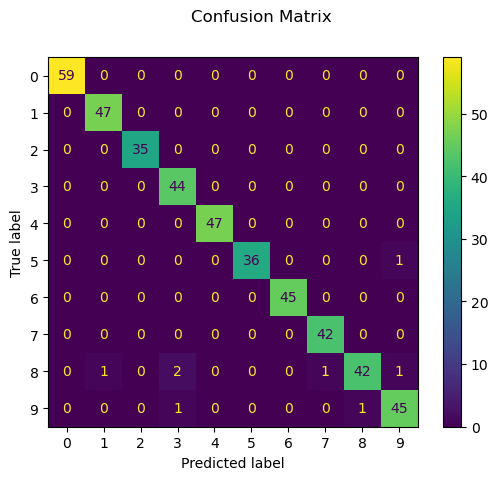

In [144]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_pca)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

## SVC_PCA

In [145]:
pca = PCA(n_components = 0.93)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [146]:
# Modèle de classification avec les composantes principales
SVC_pca =  SVC(gamma = 0.001)
SVC_pca.fit(X_train_pca, y_train)
y_pred_pca2 = SVC_pca.predict(X_test_pca)

In [147]:
print("Classification report with PCA features:")
print(classification_report(y_test, y_pred_pca2))

Classification report with PCA features:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       0.96      1.00      0.98        47
           2       1.00      1.00      1.00        35
           3       0.98      1.00      0.99        44
           4       1.00      1.00      1.00        47
           5       0.97      0.97      0.97        37
           6       1.00      1.00      1.00        45
           7       1.00      1.00      1.00        42
           8       1.00      0.89      0.94        47
           9       0.96      1.00      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



In [148]:
#Évaluer le modèle
print("\033[91mPrécision du classificateur SVM_PCA : \033[0m", SVC_pca.score(X_test_pca, y_test)) 

Précision du classificateur SVM_PCA :  0.9866666666666667


Confusion matrix:
[[59  0  0  0  0  0  0  0  0  0]
 [ 0 47  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  0  0]
 [ 0  0  0 44  0  0  0  0  0  0]
 [ 0  0  0  0 47  0  0  0  0  0]
 [ 0  0  0  0  0 36  0  0  0  1]
 [ 0  0  0  0  0  0 45  0  0  0]
 [ 0  0  0  0  0  0  0 42  0  0]
 [ 0  2  0  1  0  1  0  0 42  1]
 [ 0  0  0  0  0  0  0  0  0 47]]


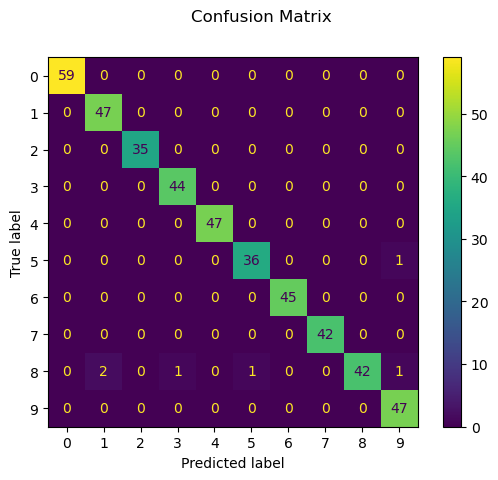

In [149]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_pca2)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# Évaluation des performances

In [150]:
from sklearn.model_selection import cross_val_score, KFold

# Définir une instance de validation croisée k-fold
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Évaluer les performances du modèle avec la validation croisée k-fold
scores = cross_val_score(SVC_pca, X_train_pca, y_train, cv=kfold, scoring='accuracy')

# Afficher les scores de validation croisée
print("Scores de validation croisée:", scores)
print("Moyenne des scores:", scores.mean())
print("Écart-type des scores:", scores.std())




kfold = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(KNN_pca, X_train_pca, y_train, cv=kfold, scoring='accuracy')

print("Scores de validation croisée:", scores)
print("Moyenne des scores:", scores.mean())
print("Écart-type des scores:", scores.std())


Scores de validation croisée: [0.98888889 0.9962963  0.97026022 0.99256506 0.98884758]
Moyenne des scores: 0.9873716095277434
Écart-type des scores: 0.008987792845885181
Scores de validation croisée: [0.98518519 0.98888889 0.9739777  0.98884758 0.98884758]
Moyenne des scores: 0.9851493873055212
Écart-type des scores: 0.00576446304723338


La performance moyenne des modèles sont élevées (environ 98.44%), ce qui indique que les modèles ont de bonnes capacités à généraliser sur de nouveaux exemples.
De plus, l'écart-type des scores est relativement faible (environ 0.43%), ce qui suggère que les performances du modèle sont relativement stables et peu
sensibles aux variations dans les données d'entraînement

# Optimisation des modèles

## KNN

In [151]:
# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_neighbors':[3, 5, 7, 9, 11, 13, 15]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = model_selection.GridSearchCV(
    neighbors.KNeighborsClassifier(), # un classifieur kNN
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)


In [152]:
# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15]},
             scoring='accuracy')

In [153]:
# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Résultats de la validation croisée :
accuracy = 0.986 (+/-0.006) for {'n_neighbors': 3}
accuracy = 0.984 (+/-0.014) for {'n_neighbors': 5}
accuracy = 0.979 (+/-0.018) for {'n_neighbors': 7}
accuracy = 0.978 (+/-0.022) for {'n_neighbors': 9}
accuracy = 0.978 (+/-0.019) for {'n_neighbors': 11}
accuracy = 0.975 (+/-0.022) for {'n_neighbors': 13}
accuracy = 0.970 (+/-0.030) for {'n_neighbors': 15}


Nous remarquerons que pour le modèle KNN, la valeur optimale choisie pour le nombre de voisins est 3,
ce qui signifie que le modèle a obtenu les meilleurs résultats en termes de précision lorsqu'il a été entraîné avec 3 voisins les plus proches.

## KNN_PCA

In [154]:
param_grid = {
    'pca__n_components': [0.90, 0.91, 0.92, 0.93, 0.94, 0.95],  # Valeurs de n_components à tester pour PCA
    'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15]  # Valeurs de n_neighbors à tester pour KNN
}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un pipeline avec PCA et un classifieur KNN
pipeline = Pipeline([
    ('pca', PCA()),  # PCA
    ('knn', KNeighborsClassifier())  # KNN
])

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
clf = GridSearchCV(
    pipeline,       # le pipeline
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

In [155]:
# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'pca__n_components': [0.9, 0.91, 0.92, 0.93, 0.94,
                                               0.95]},
             scoring='accuracy')

In [156]:
# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'knn__n_neighbors': 3, 'pca__n_components': 0.92}


In [157]:
# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Résultats de la validation croisée :
accuracy = 0.983 (+/-0.008) for {'knn__n_neighbors': 3, 'pca__n_components': 0.9}
accuracy = 0.983 (+/-0.010) for {'knn__n_neighbors': 3, 'pca__n_components': 0.91}
accuracy = 0.985 (+/-0.005) for {'knn__n_neighbors': 3, 'pca__n_components': 0.92}
accuracy = 0.983 (+/-0.006) for {'knn__n_neighbors': 3, 'pca__n_components': 0.93}
accuracy = 0.984 (+/-0.006) for {'knn__n_neighbors': 3, 'pca__n_components': 0.94}
accuracy = 0.984 (+/-0.006) for {'knn__n_neighbors': 3, 'pca__n_components': 0.95}
accuracy = 0.981 (+/-0.010) for {'knn__n_neighbors': 5, 'pca__n_components': 0.9}
accuracy = 0.982 (+/-0.010) for {'knn__n_neighbors': 5, 'pca__n_components': 0.91}
accuracy = 0.983 (+/-0.011) for {'knn__n_neighbors': 5, 'pca__n_components': 0.92}
accuracy = 0.984 (+/-0.013) for {'knn__n_neighbors': 5, 'pca__n_components': 0.93}
accuracy = 0.982 (+/-0.013) for {'knn__n_neighbors': 5, 'pca__n_components': 0.94}
accuracy = 0.982 (+/-0.013) for {'knn__n_neighbors':

In [158]:
# Afficher la meilleure précision obtenue
print("Meilleure précision :", clf.best_score_)

Meilleure précision : 0.9851548946716232


Nous observons que pour le modèle KNN_PC, nous conservons 94% des composantes principales et prenons 3 voisins.
Ces paramètres sont choisis pour garantir les meilleures performances possibles pour le modèle sélectionné.

## SVC

In [159]:
# Définir les valeurs des hyperparamètres à tester
param_grid = {
    'gamma': [0.001, 0.01, 0.1, 1]  # Valeurs de gamma à tester pour SVM
}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un classifieur SVM
svm = SVC()

# Créer un classifieur SVM avec recherche d'hyperparamètre par validation croisée
clf = GridSearchCV(
    svm,           # le classifieur SVM
    param_grid,    # hyperparamètres à tester
    cv=5,          # nombre de folds de validation croisée
    scoring=score  # score à optimiser
)


In [160]:
# Optimiser ce classifieur sur le jeu d'entraînement
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), param_grid={'gamma': [0.001, 0.01, 0.1, 1]},
             scoring='accuracy')

In [161]:
# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(clf.best_params_)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'gamma': 0.001}


In [162]:
# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        clf.cv_results_['mean_test_score'], # score moyen
        clf.cv_results_['std_test_score'],  # écart-type du score
        clf.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )

Résultats de la validation croisée :
accuracy = 0.988 (+/-0.009) for {'gamma': 0.001}
accuracy = 0.745 (+/-0.070) for {'gamma': 0.01}
accuracy = 0.108 (+/-0.000) for {'gamma': 0.1}
accuracy = 0.108 (+/-0.000) for {'gamma': 1}


In [163]:
# Afficher la meilleure précision obtenue
print("Meilleure précision :", clf.best_score_)

Meilleure précision : 0.9881233650006884


## SVC_PCA

In [178]:
param_grid = {
    'svm__gamma': [0.001, 0.01, 0.1, 1],  # Valeurs de gamma à tester pour SVM
    'pca__n_components': [0.90, 0.91, 0.92, 0.93, 0.94, 0.95]  # Valeurs de n_components à tester pour PCA
}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'accuracy'

# Créer un pipeline avec PCA et un classifieur SVM
pipeline = Pipeline([
    ('pca', PCA()),  # PCA
    ('svm', SVC())   # SVM
])

# Créer un classifieur SVM avec recherche d'hyperparamètre par validation croisée
svm_pca = GridSearchCV(
    pipeline,       # le pipeline
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

In [180]:
# Optimiser ce classifieur sur le jeu d'entraînement
svm_pca.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('pca', PCA()), ('svm', SVC())]),
             param_grid={'pca__n_components': [0.9, 0.91, 0.92, 0.93, 0.94,
                                               0.95],
                         'svm__gamma': [0.001, 0.01, 0.1, 1]},
             scoring='accuracy')

In [186]:
# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(svm_pca.best_params_)

Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'pca__n_components': 0.93, 'svm__gamma': 0.001}


In [187]:
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        svm_pca.cv_results_['mean_test_score'],  # score moyen
        svm_pca.cv_results_['std_test_score'],   # écart-type du score
        svm_pca.cv_results_['params']            # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/- {:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ))


Résultats de la validation croisée :
accuracy = 0.989 (+/- 0.006) for {'pca__n_components': 0.9, 'svm__gamma': 0.001}
accuracy = 0.862 (+/- 0.026) for {'pca__n_components': 0.9, 'svm__gamma': 0.01}
accuracy = 0.106 (+/- 0.002) for {'pca__n_components': 0.9, 'svm__gamma': 0.1}
accuracy = 0.106 (+/- 0.002) for {'pca__n_components': 0.9, 'svm__gamma': 1}
accuracy = 0.990 (+/- 0.006) for {'pca__n_components': 0.91, 'svm__gamma': 0.001}
accuracy = 0.852 (+/- 0.030) for {'pca__n_components': 0.91, 'svm__gamma': 0.01}
accuracy = 0.106 (+/- 0.002) for {'pca__n_components': 0.91, 'svm__gamma': 0.1}
accuracy = 0.106 (+/- 0.002) for {'pca__n_components': 0.91, 'svm__gamma': 1}
accuracy = 0.990 (+/- 0.006) for {'pca__n_components': 0.92, 'svm__gamma': 0.001}
accuracy = 0.837 (+/- 0.029) for {'pca__n_components': 0.92, 'svm__gamma': 0.01}
accuracy = 0.106 (+/- 0.002) for {'pca__n_components': 0.92, 'svm__gamma': 0.1}
accuracy = 0.106 (+/- 0.002) for {'pca__n_components': 0.92, 'svm__gamma': 1}
accu

In [188]:
# Afficher la meilleure précision obtenue
print("Meilleure précision :", svm_pca.best_score_)

Meilleure précision : 0.9907254519741621
